# Without PCA LDA

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using original features
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")



Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.6277
Precision: 0.6691
Recall: 0.6277
F1-score: 0.5829

Logistic Regression:
Training Accuracy: 0.9937
Testing Accuracy: 0.8431
Precision: 0.8486
Recall: 0.8431
F1-score: 0.8380


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoost:
Training Accuracy: 0.4843
Testing Accuracy: 0.4599
Precision: 0.4335
Recall: 0.4599
F1-score: 0.4051

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.4015
Precision: 0.4070
Recall: 0.4015
F1-score: 0.4019

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.6569
Precision: 0.6525
Recall: 0.6569
F1-score: 0.6346

KNN:
Training Accuracy: 0.7398
Testing Accuracy: 0.5839
Precision: 0.6053
Recall: 0.5839
F1-score: 0.5650

SVM:
Training Accuracy: 0.9796
Testing Accuracy: 0.8212
Precision: 0.8541
Recall: 0.8212
F1-score: 0.8108

Naïve Bayes:
Training Accuracy: 0.5533
Testing Accuracy: 0.4854
Precision: 0.6255
Recall: 0.4854
F1-score: 0.4778

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.6314
Precision: 0.6165
Recall: 0.6314
F1-score: 0.5984


# PCA components are linear combinations of original feature

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit','Visit_int']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

# Print the most valuable features for each principal component
components = pca.components_
most_valuable_features = [np.abs(components[i]).argmax() for i in range(components.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using PCA reduced features
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_train_pred = clf.predict(X_train_pca)
    y_test_pred = clf.predict(X_test_pca)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")


Explained variance ratio of each principal component:
 [0.18554571 0.10654163 0.07600052 0.07303986 0.03795287 0.03236963
 0.0282691  0.02763553 0.0238559  0.02128833]

Most valuable features for each principal component:
Principal Component 1: NP3FTAPL
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RTCON
Principal Component 4: NP3RTCON
Principal Component 5: NP1SLPN
Principal Component 6: NP3RIGN
Principal Component 7: NP1SLPN
Principal Component 8: NP2HWRT
Principal Component 9: NP3TTAPL
Principal Component 10: NP2HWRT

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.8248
Precision: 0.8341
Recall: 0.8248
F1-score: 0.8198

Logistic Regression:
Training Accuracy: 0.9373
Testing Accuracy: 0.8796
Precision: 0.8910
Recall: 0.8796
F1-score: 0.8765

AdaBoost:
Training Accuracy: 0.5392
Testing Accuracy: 0.5036
Precision: 0.3291
Recall: 0.5036
F1-score: 0.3840

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.8212
Precision: 0.8222
Recall: 0.8212
F1-score: 

B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8650
Precision: 0.8707
Recall: 0.8650
F1-score: 0.8645

KNN:
Training Accuracy: 0.8401
Testing Accuracy: 0.7518
Precision: 0.7502
Recall: 0.7518
F1-score: 0.7348

SVM:
Training Accuracy: 0.9389
Testing Accuracy: 0.8358
Precision: 0.8525
Recall: 0.8358
F1-score: 0.8258

Naïve Bayes:
Training Accuracy: 0.8339
Testing Accuracy: 0.7737
Precision: 0.7815
Recall: 0.7737
F1-score: 0.7667

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.8613
Precision: 0.8746
Recall: 0.8613
F1-score: 0.8590


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
# 1. Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

Explained variance ratio of each principal component:
 [0.18554571 0.10654163 0.07600052 0.07303986 0.03795287 0.03236963
 0.0282691  0.02763553 0.0238559  0.02128833]


Cumulative explained variance:
 [0.18554571 0.29208734 0.36808785 0.44112771 0.47908058 0.5114502
 0.5397193  0.56735483 0.59121073 0.61249906]


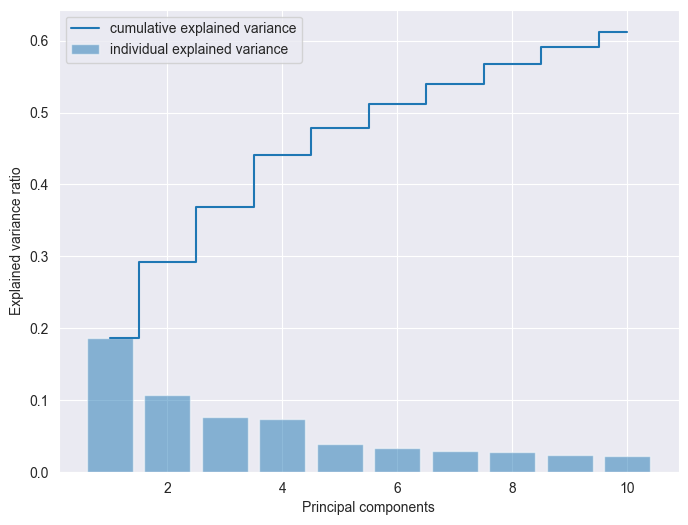

In [4]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [5]:
len(X_train_pca)

638

In [6]:
len(X_test_pca)

274

In [7]:
components = pca.components_
feature_names = X.columns

print("\nTop 20 features for each principal component:")
for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:5]
    top_features = feature_names[top_features_indices]
    print(f"\nPrincipal Component {i+1}:")
    for feature in top_features:
        print(f"{feature}")


Top 20 features for each principal component:

Principal Component 1:
NP3FTAPL
NP3HMOVL
NP3TTAPL
NP2SALV
NP2HOBB

Principal Component 2:
NP3FTAPL
NP3PRSPL
NP3RTARU
NP3HMOVL
NP3TTAPL

Principal Component 3:
NP3RTCON
NP3RTARU
NP1SLPN
NP3FTAPR
NP3HMOVR

Principal Component 4:
NP3RTCON
NP2TRMR
NP3RTARU
NP3RTALU
NP1SLPN

Principal Component 5:
NP1SLPN
NP2SALV
NP2SPCH
NP1PAIN
NP2HWRT

Principal Component 6:
NP3RIGN
NP3RIGLL
NP3LGAGR
NP3TTAPR
NP3RIGLU

Principal Component 7:
NP1SLPN
NP2SALV
NP1ANXS
NP1DPRS
NP2WALK

Principal Component 8:
NP2HWRT
NP1URIN
NP3POSTR
NP3GAIT
NP3RISNG

Principal Component 9:
NP3TTAPL
NP3TTAPR
NP2SALV
NP3HMOVR
NP3LGAGR

Principal Component 10:
NP2HWRT
NP1ANXS
NP1DPRS
NP2SALV
NP1SLPD


                 PC1                 PC2                 PC3  \
0  NP3FTAPL (0.2098)  NP3FTAPL (-0.3272)  NP3RTCON (-0.4317)   
1  NP3HMOVL (0.2046)  NP3PRSPL (-0.3269)  NP3RTARU (-0.3026)   
2  NP3TTAPL (0.1989)   NP3RTARU (0.2962)    NP1SLPN (0.2933)   
3   NP2SALV (0.1929)  NP3HMOVL (-0.2776)  NP3FTAPR (-0.2272)   
4   NP2HOBB (0.1895)  NP3TTAPL (-0.2697)  NP3HMOVR (-0.2267)   
5   NP2DRES (0.1894)  NP3RTALU (-0.2589)  NP3PRSPR (-0.1956)   
6  NP3TTAPR (0.1842)  NP3RIGLU (-0.2431)    NP1FATG (0.1940)   
7  NP3FTAPR (0.1822)   NP3RIGRU (0.2252)    NP1SLPD (0.1929)   
8  NP3BRADY (0.1809)  NP3LGAGL (-0.2037)    NP1PAIN (0.1793)   
9  NP3HMOVR (0.1804)   NP3FTAPR (0.1964)    NP2SALV (0.1792)   

                  PC4                 PC5                 PC6  \
0   NP3RTCON (0.6086)    NP1SLPN (0.5254)   NP3RIGN (-0.3579)   
1    NP2TRMR (0.3178)   NP2SALV (-0.4667)  NP3RIGLL (-0.3383)   
2   NP3RTARU (0.2746)   NP2SPCH (-0.3072)   NP3LGAGR (0.2969)   
3   NP3RTALU (0.2709)    NP1PAIN (0

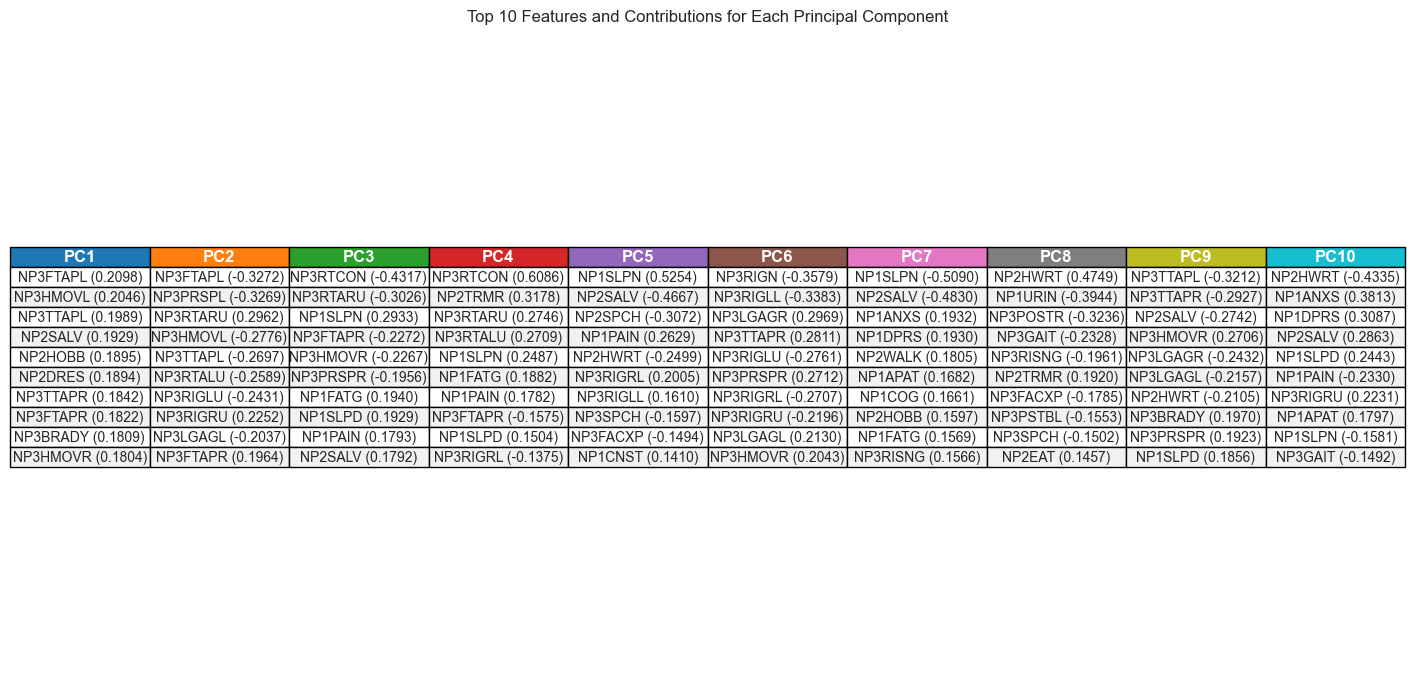

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Assuming PCA is already performed and components are stored in 'components'
components = pca.components_
feature_names = X.columns

# Initialize an empty DataFrame to store top features and their contributions for each PCA component
top_features_df = pd.DataFrame()

# Get top 10 features and their contributions for each principal component
top_n = 10  # Number of top features to select
for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:top_n]
    top_features = feature_names[top_features_indices]
    top_contributions = components[i, top_features_indices]  # Get the loadings (contributions) with signs

    # Create a new column combining the feature name and its contribution with sign
    top_features_contrib = [f'{feature} ({contrib:.4f})' for feature, contrib in zip(top_features, top_contributions)]
    top_features_df[f'PC{i+1}'] = top_features_contrib  # Store top features with contributions

print(top_features_df)

# Plot the table
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')

# Add cell colors for better visibility
colors = list(mcolors.TABLEAU_COLORS.values())  # Use a color palette from matplotlib
table = ax.table(cellText=top_features_df.values, colLabels=top_features_df.columns, cellLoc='center', loc='center')

# Customize table style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Set background colors for the header and each row
for i in range(len(top_features_df.columns)):
    table[0, i].set_fontsize(12)
    table[0, i].set_text_props(weight='bold', color='white')
    table[0, i].set_facecolor(colors[i % len(colors)])  # Cycle through colors for headers

# Set alternating row colors for better readability
for i in range(1, top_n+1):
    for j in range(len(top_features_df.columns)):
        table[i, j].set_facecolor('#f1f1f2' if i % 2 == 0 else '#ffffff')  # Light gray and white

plt.title("Top 10 Features and Contributions for Each Principal Component", pad=20)
plt.show()


In [9]:
top_features_union = set()

for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:10]
    top_features = feature_names[top_features_indices]
    top_features_union.update(top_features)

# Print the union of top features and its length
print("\nUnion of top 20 features for each principal component:")
print(top_features_union)
print(f"\nLength of union features: {len(top_features_union)}")


Union of top 20 features for each principal component:
{'NP1PAIN', 'NP3HMOVR', 'NP1COG', 'NP1CNST', 'NP3BRADY', 'NP1SLPD', 'NP3PRSPR', 'NP3LGAGL', 'NP1APAT', 'NP3RISNG', 'NP3RIGLU', 'NP3RTARU', 'NP3PRSPL', 'NP2HWRT', 'NP3RIGN', 'NP2DRES', 'NP3SPCH', 'NP3RIGRL', 'NP2SALV', 'NP2WALK', 'NP3RIGLL', 'NP1DPRS', 'NP3RIGRU', 'NP3HMOVL', 'NP1URIN', 'NP3LGAGR', 'NP3POSTR', 'NP3GAIT', 'NP2HOBB', 'NP3PSTBL', 'NP1SLPN', 'NP3TTAPL', 'NP1FATG', 'NP3RTALU', 'NP3TTAPR', 'NP3FACXP', 'NP3FTAPL', 'NP1ANXS', 'NP2TRMR', 'NP2EAT', 'NP3RTCON', 'NP3FTAPR', 'NP2SPCH'}

Length of union features: 43


In [10]:
# 3. Principal Component Scores
print("Principal Component Scores (first 5 samples):\n", X_train_pca[:5])

Principal Component Scores (first 5 samples):
 [[ 3.7315911   0.26676968  0.37852936 -0.65832853  1.33282321  0.13485415
  -0.70201984  2.28404394 -0.86390768  1.72217741]
 [-2.30294746  2.48151712 -0.39091708  0.34202015 -0.10142022  0.2617972
   1.06422847  0.38255196  0.38583647  0.51131405]
 [ 0.6388345   2.32275281  0.48986591  0.12264396 -0.28977147 -0.10113728
   1.39087155  1.90283543  0.09506725  1.55509465]
 [ 0.87290098  1.0283966   1.34096566 -1.52924508 -0.28477517 -1.38551009
   0.2204676  -1.42366296 -0.24019155  0.43291975]
 [ 1.12413075  2.0678016  -1.1180688  -1.21519542 -2.05667256 -0.20104764
  -1.97415197 -0.85425027  1.9269099   1.08229756]]


In [11]:
# 4. Loading Scores
loading_scores = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nLoading scores (contributions of each feature to the principal components):")
print(loading_scores)


Loading scores (contributions of each feature to the principal components):
                    PC1       PC2       PC3       PC4       PC5       PC6  \
Area          -0.003017 -0.000342  0.014123 -0.014206 -0.000823  0.003183   
Circularity    0.002681 -0.002899 -0.002011  0.000295 -0.003512 -0.005430   
ConvexArea    -0.001486  0.001210  0.011411 -0.011542 -0.001915  0.004465   
EquivDiameter -0.007215  0.001599  0.008529 -0.010223  0.000732 -0.000142   
Extent        -0.004122  0.000966 -0.006268 -0.005843 -0.003091 -0.007759   
...                 ...       ...       ...       ...       ...       ...   
NP3RTCON      -0.064161 -0.010012 -0.431706  0.608640 -0.003847  0.011246   
NP3SPCH        0.134180 -0.007567 -0.029903 -0.055969 -0.159724 -0.018986   
NP3TTAPL       0.198924 -0.269651 -0.028751  0.017646  0.079292  0.131310   
NP3TTAPR       0.184216  0.149800 -0.139421 -0.051692  0.134019  0.281113   
NHY            0.121963 -0.023089 -0.022678 -0.041911 -0.003470 -0.015252   

In [12]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first principal component:")
correlations = loading_scores['PC1']
print(correlations)


Correlation of each feature with the first principal component:
Area            -0.003017
Circularity      0.002681
ConvexArea      -0.001486
EquivDiameter   -0.007215
Extent          -0.004122
                   ...   
NP3RTCON        -0.064161
NP3SPCH          0.134180
NP3TTAPL         0.198924
NP3TTAPR         0.184216
NHY              0.121963
Name: PC1, Length: 91, dtype: float64


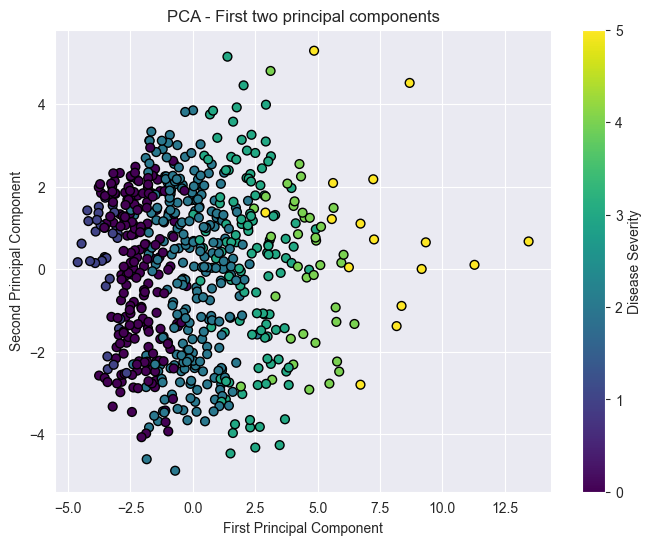

In [13]:
# 6. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First two principal components')
plt.colorbar(label='Disease Severity')
plt.show()


In [14]:

# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 10


In [15]:

# 8. Feature Importance
most_valuable_features = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]


print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")


Most valuable features for each principal component:
Principal Component 1: NP3FTAPL
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RTCON
Principal Component 4: NP3RTCON
Principal Component 5: NP1SLPN
Principal Component 6: NP3RIGN
Principal Component 7: NP1SLPN
Principal Component 8: NP2HWRT
Principal Component 9: NP3TTAPL
Principal Component 10: NP2HWRT



Correlation matrix of principal components:
 [[ 1.00000000e+00 -5.05218470e-16 -5.50953643e-17  1.23106762e-16
  -6.49710374e-18  2.01004235e-17 -1.72071143e-17  4.35081011e-18
   4.21452534e-17 -2.72643983e-17]
 [-5.05218470e-16  1.00000000e+00  5.62619680e-17  4.66190907e-16
  -1.43921414e-17  9.28408360e-18 -1.13538679e-17  3.10407384e-17
   2.47190594e-17 -9.81273967e-18]
 [-5.50953643e-17  5.62619680e-17  1.00000000e+00  1.03298295e-15
  -6.90312750e-16  1.94721577e-16 -4.08330214e-16 -5.77838183e-17
   3.20111590e-17  3.87275848e-17]
 [ 1.23106762e-16  4.66190907e-16  1.03298295e-15  1.00000000e+00
   6.80495232e-17 -7.04812152e-17  7.19917691e-17  6.93450752e-18
   2.61227984e-17  2.37028177e-17]
 [-6.49710374e-18 -1.43921414e-17 -6.90312750e-16  6.80495232e-17
   1.00000000e+00  3.90547368e-16 -5.62370299e-16 -1.59931847e-16
   1.86372501e-16 -7.67245656e-17]
 [ 2.01004235e-17  9.28408360e-18  1.94721577e-16 -7.04812152e-17
   3.90547368e-16  1.00000000e+00  2.72768617e-17  2.

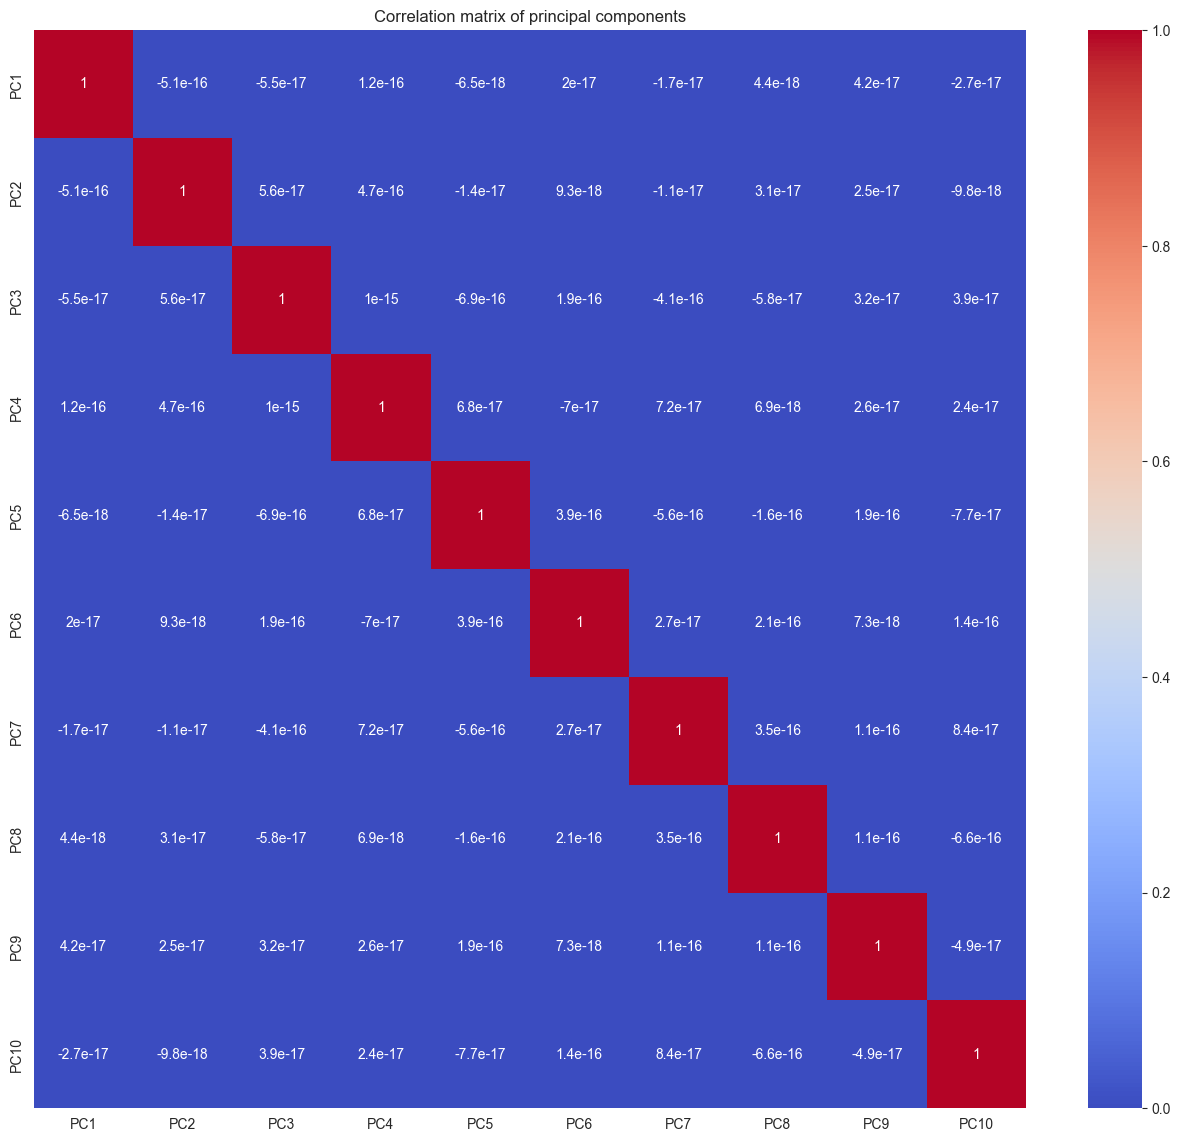

In [16]:
# 9. Multicollinearity
# PCA components are orthogonal, hence uncorrelated
correlation_matrix = np.corrcoef(X_train_pca.T)
print("\nCorrelation matrix of principal components:\n", correlation_matrix)

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=[f'PC{i+1}' for i in range(pca.n_components_)], yticklabels=[f'PC{i+1}' for i in range(pca.n_components_)])
plt.title('Correlation matrix of principal components')
plt.show()

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_components = 2 # min(X.shape[1], len(np.unique(y)) - 1)  # Ensure n_components is within valid range
print(n_components)
lda = LDA(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_lda, y_train)
    y_train_pred = clf.predict(X_train_lda)
    y_test_pred = clf.predict(X_test_lda)
    
    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Calculate metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Testing Precision: {test_precision:.4f}")
    print(f"Testing Recall: {test_recall:.4f}")
    print(f"Testing F1-score: {test_f1:.4f}")




2

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.9126
Testing Precision: 0.9175
Testing Recall: 0.9126
Testing F1-score: 0.9124

Logistic Regression:
Training Accuracy: 0.9588
Testing Accuracy: 0.9016
Testing Precision: 0.9046
Testing Recall: 0.9016
Testing F1-score: 0.9013


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost:
Training Accuracy: 0.8944
Testing Accuracy: 0.8142
Testing Precision: 0.7582
Testing Recall: 0.8142
Testing F1-score: 0.7781

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.9180
Testing Precision: 0.9215
Testing Recall: 0.9180
Testing F1-score: 0.9180

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.9016
Testing Precision: 0.9067
Testing Recall: 0.9016
Testing F1-score: 0.9021

KNN:
Training Accuracy: 0.9643
Testing Accuracy: 0.8962
Testing Precision: 0.9010
Testing Recall: 0.8962
Testing F1-score: 0.8963

SVM:
Training Accuracy: 0.9643
Testing Accuracy: 0.8962
Testing Precision: 0.9015
Testing Recall: 0.8962
Testing F1-score: 0.8959

Naïve Bayes:
Training Accuracy: 0.9602
Testing Accuracy: 0.8907
Testing Precision: 0.8986
Testing Recall: 0.8907
Testing F1-score: 0.8915

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.9071
Testing Precision: 0.9124
Testing Recall: 0.9071
Testing F1-score: 0.9069


           Feature LD1  Scaling LD1         Feature LD2  Scaling LD2
0      Shannon_Entropy   -12.627587                Area   107.803536
1             contrast    12.236485          FilledArea  -104.589562
2   Standard Deviation   -11.251527         homogeneity    46.040089
3        gabor_entropy   -11.150114  Standard Deviation   -36.754253
4          homogeneity    -9.612906            Skewness   -34.425123
5        dissimilarity    -9.330490     Shannon_Entropy    32.515435
6                 Area     8.799593            contrast    19.010071
7           FilledArea    -8.504989            Kurtosis    18.232062
8               energy    -6.943889              energy   -17.857968
9             Skewness    -6.151430       dissimilarity   -12.947126
10        gabor_energy     5.784121       gabor_entropy    -7.794006
11          brightness     5.630897          brightness     6.358834
12                Mean     5.630897                Mean     6.358834
13   Major axis length     3.81876

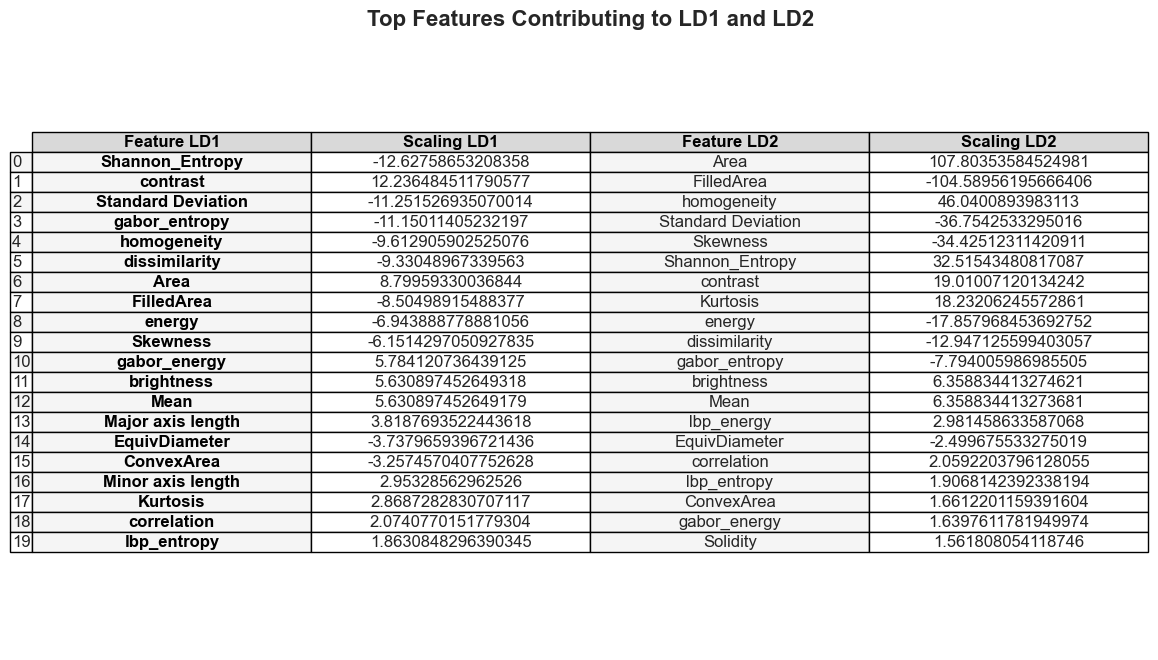

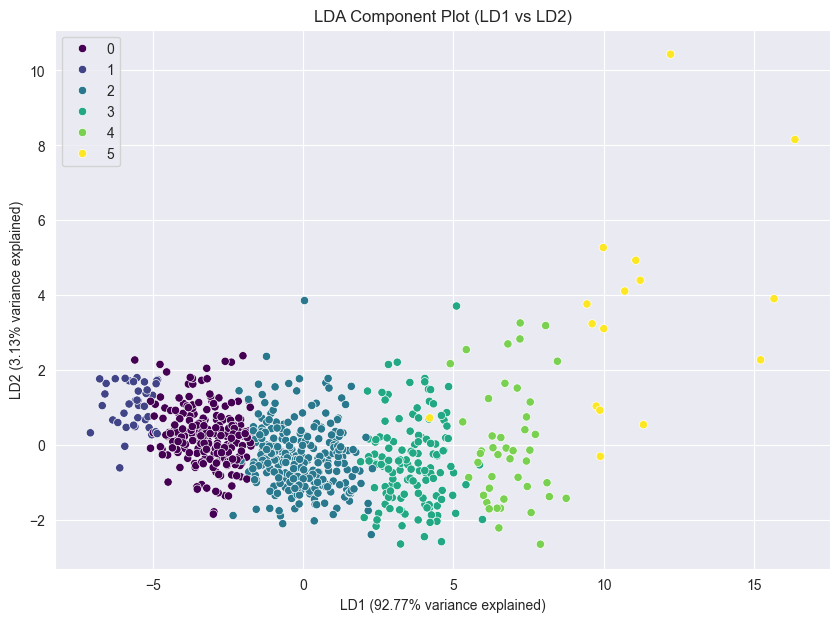


Top 20 important features according to Random Forest:
                  Feature  Importance
69               NP3POSTR    0.021870
27      DATSCAN_PUTAMEN_R    0.020583
44                NP2DRES    0.020295
77                NP3RIGN    0.018938
90                    NHY    0.018877
47                NP2HOBB    0.018083
25      DATSCAN_CAUDATE_R    0.018029
26      DATSCAN_CAUDATE_L    0.017334
30  DATSCAN_PUTAMEN_L_ANT    0.017185
55                NP2TURN    0.016530
29  DATSCAN_PUTAMEN_R_ANT    0.015824
11        Shannon_Entropy    0.015290
57               NP3BRADY    0.015160
68               NP3LGAGR    0.015092
28      DATSCAN_PUTAMEN_L    0.015047
1             Circularity    0.014948
17            correlation    0.014753
64               NP3HMOVR    0.014568
7       Major axis length    0.014487
88               NP3TTAPL    0.014402


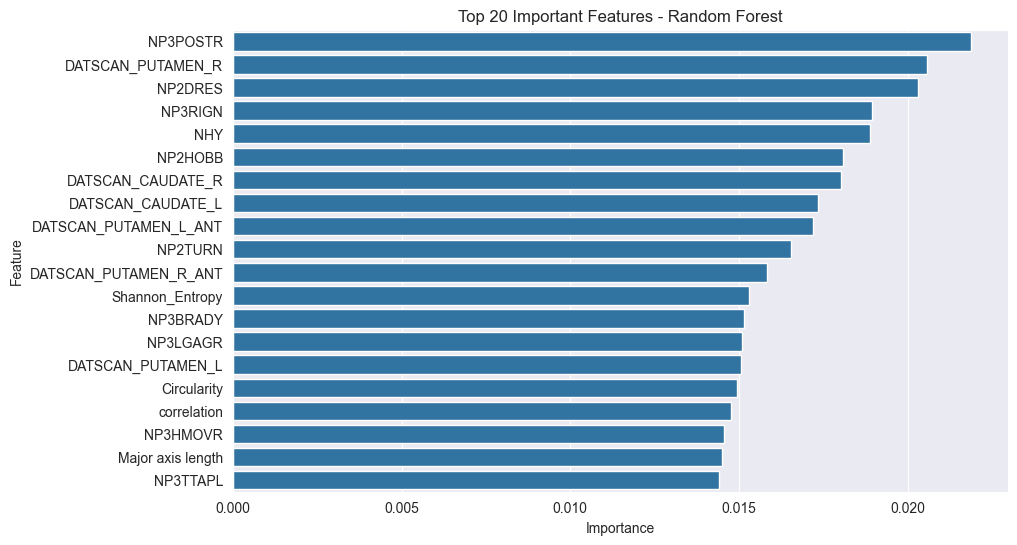


Top 20 selected features by RFE:
     Feature  Ranking
31   NP1ANXS        1
40   NP1PAIN        1
41   NP1SLPD        1
44   NP2DRES        1
45    NP2EAT        1
47   NP2HOBB        1
50   NP2RISE        1
52   NP2SPCH        1
56   NP2WALK        1
58  NP3FACXP        1
60  NP3FTAPL        1
61  NP3FTAPR        1
68  NP3LGAGR        1
69  NP3POSTR        1
70  NP3PRSPL        1
73  NP3PTRML        1
79  NP3RIGRU        1
80  NP3RISNG        1
86  NP3RTCON        1
88  NP3TTAPL        1


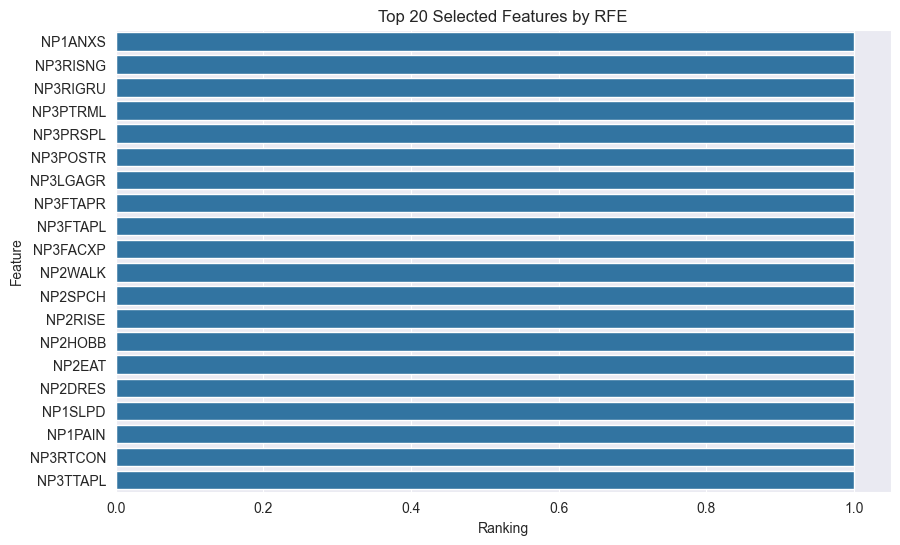


Top 20 selected features by Lasso (L1):
                  Feature  Coefficient
29  DATSCAN_PUTAMEN_R_ANT    -0.555689
11        Shannon_Entropy    -0.543127
77                NP3RIGN    -0.496465
43                NP1URIN    -0.482506
30  DATSCAN_PUTAMEN_L_ANT     0.416840
80               NP3RISNG    -0.393214
67               NP3LGAGL    -0.383602
70               NP3PRSPL    -0.368758
89               NP3TTAPR    -0.366737
40                NP1PAIN    -0.358510
78               NP3RIGRL    -0.358443
52                NP2SPCH    -0.293469
69               NP3POSTR    -0.284493
48                NP2HWRT    -0.283232
38                NP1FATG    -0.264159
86               NP3RTCON    -0.264130
82               NP3RTALL    -0.257692
35                NP1DPRS    -0.257422
47                NP2HOBB    -0.250333
76               NP3RIGLU    -0.244289


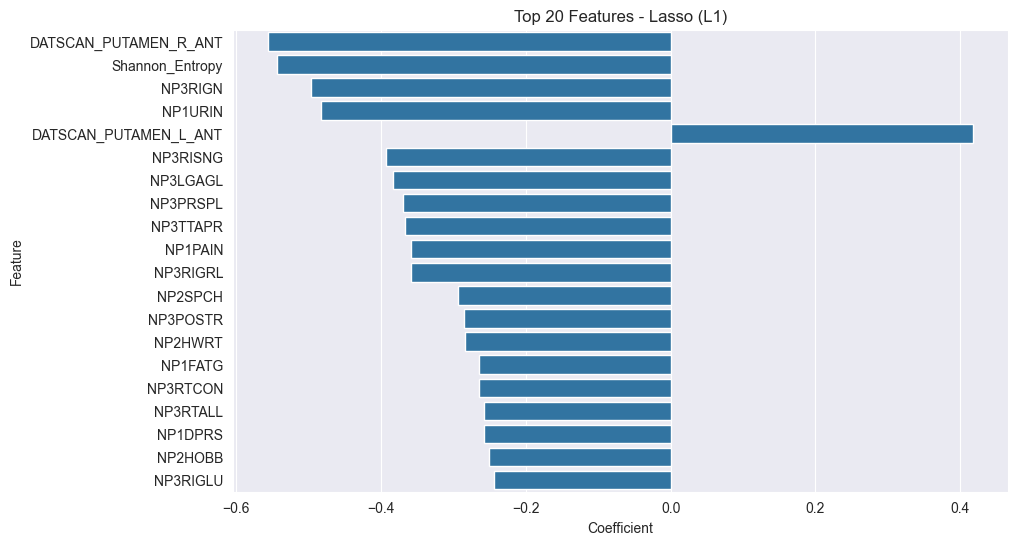


Top 20 features based on Mutual Information:
     Feature  Mutual Information
44   NP2DRES            0.242228
50   NP2RISE            0.194205
47   NP2HOBB            0.164867
89  NP3TTAPR            0.156068
57  NP3BRADY            0.155078
63  NP3HMOVL            0.150762
87   NP3SPCH            0.144119
55   NP2TURN            0.140949
52   NP2SPCH            0.140075
77   NP3RIGN            0.138142
88  NP3TTAPL            0.135322
90       NHY            0.134280
38   NP1FATG            0.132856
62   NP3GAIT            0.131845
60  NP3FTAPL            0.128061
58  NP3FACXP            0.127505
64  NP3HMOVR            0.126053
56   NP2WALK            0.124789
69  NP3POSTR            0.123885
45    NP2EAT            0.121506


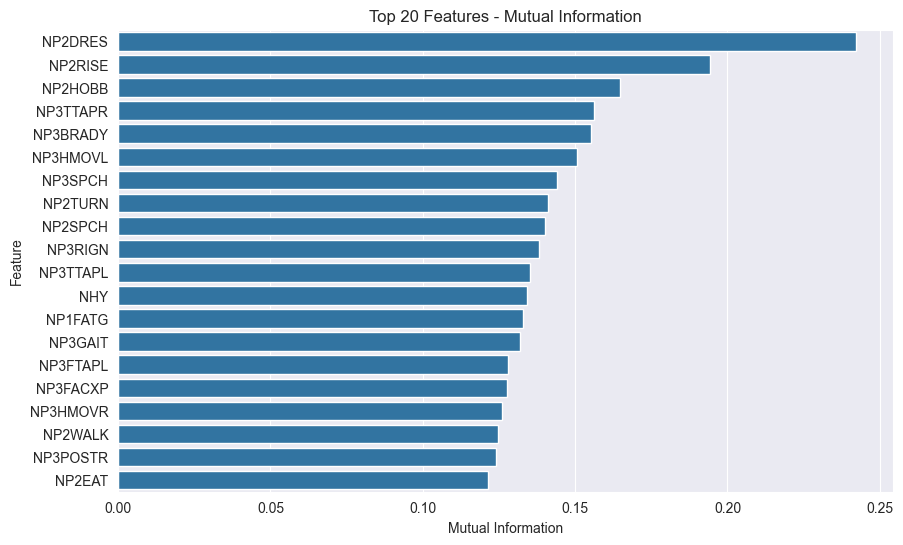

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, mutual_info_classif, chi2
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is already preprocessed and split into X_train, X_test, y_train, y_test

# Instantiate and fit the LDA model
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

# Get the explained variance ratios for each component
lda_variance_ratios = lda.explained_variance_ratio_

# Extract top 20 features for both LD1 and LD2
top_20_idx_ld1 = np.abs(lda.scalings_[:, 0]).argsort()[::-1][:20]
top_20_features_ld1 = X.columns[top_20_idx_ld1]
top_20_scalings_ld1 = lda.scalings_[top_20_idx_ld1, 0]

top_20_idx_ld2 = np.abs(lda.scalings_[:, 1]).argsort()[::-1][:20]
top_20_features_ld2 = X.columns[top_20_idx_ld2]
top_20_scalings_ld2 = lda.scalings_[top_20_idx_ld2, 1]

# Create a DataFrame to hold the top 20 features and their scalings for both LD1 and LD2
top_features_table = pd.DataFrame({
    'Feature LD1': top_20_features_ld1,
    'Scaling LD1': top_20_scalings_ld1,
    'Feature LD2': top_20_features_ld2,
    'Scaling LD2': top_20_scalings_ld2
})

# Display the table
print(top_features_table)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figsize as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = plt.table(cellText=top_features_table.values,
                  rowLabels=top_features_table.index,
                  colLabels=top_features_table.columns,
                  cellLoc='center',
                  loc='center')

# Adjust table style
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust scaling as needed

# Styling the table
colors = ['#f5f5f5', '#ffffff']  # Alternating row colors
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0:  # Header row
        cell.set_text_props(fontweight='bold', color='black')
        cell.set_facecolor('#d9d9d9')  # Header background color
    elif key[1] == 0:  # First column (index column)
        cell.set_text_props(fontweight='bold', color='black')
        cell.set_facecolor('#f5f5f5')  # Index column background color
    else:
        cell.set_facecolor(colors[i % 2])  # Alternating row colors

# Add border lines
for key in table.get_celld().keys():
    cell = table.get_celld()[key]
    cell.set_edgecolor('black')
    cell.set_linewidth(1)

# Show the plot
plt.title('Top Features Contributing to LD1 and LD2', fontsize=16, weight='bold')
plt.show()


# Plot the LDA components (LD1 and LD2)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y_train, palette="viridis")
plt.title("LDA Component Plot (LD1 vs LD2)")
plt.xlabel(f"LD1 ({lda_variance_ratios[0]*100:.2f}% variance explained)")
plt.ylabel(f"LD2 ({lda_variance_ratios[1]*100:.2f}% variance explained)")
plt.show()



### 1. Feature Importance using Random Forest ###
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

print("\nTop 20 important features according to Random Forest:")
print(rf_feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Top 20 Important Features - Random Forest')
plt.show()


### 2. Recursive Feature Elimination (RFE) using Logistic Regression ###
logreg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(logreg, n_features_to_select=20)
rfe.fit(X_train, y_train)

# Create a DataFrame with RFE feature rankings
rfe_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})

# Select the top 20 features with rank 1
top_rfe_features = rfe_features_df[rfe_features_df['Ranking'] == 1]
print("\nTop 20 selected features by RFE:")
print(top_rfe_features)

# Plot the top RFE features
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=top_rfe_features.sort_values(by='Ranking'))
plt.title('Top 20 Selected Features by RFE')
plt.show()


### 3. L1 Regularization (Lasso) for Feature Selection ###
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_train_scaled, y_train)

# Create a DataFrame with feature names and their Lasso coefficients
lasso_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False).head(20)

print("\nTop 20 selected features by Lasso (L1):")
print(lasso_features_df)

# Plot the Lasso feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lasso_features_df)
plt.title('Top 20 Features - Lasso (L1)')
plt.show()


### 4. Mutual Information for Feature Selection ###
mi = mutual_info_classif(X, y)

# Create a DataFrame with feature names and their mutual information scores
mi_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False).head(20)

print("\nTop 20 features based on Mutual Information:")
print(mi_features_df)

# Plot the Mutual Information scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_features_df)
plt.title('Top 20 Features - Mutual Information')
plt.show()





In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of LDA components to the number of classes minus one
n_components =2#len(np.unique(y_train)) - 1  # Set based on number of classes

# Initialize and fit the LDA model
lda = LDA(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train)

# Get the absolute values of the scalings (coefficients)
lda_scalings = np.abs(lda.scalings_)

# Create a DataFrame for the feature importance
feature_importance = pd.DataFrame(lda_scalings, index=X.columns, columns=[f'LD{i+1}' for i in range(n_components)])

# Sort the features by their contribution for each LD component
for i in range(n_components):
    top_features = feature_importance[f'LD{i+1}'].sort_values(ascending=False).head(20)
    print(f"Top 20 features contributing to LD{i+1}:")
    print(top_features)

# Extract top 20 features for both LD1 and LD2
top_features_ld1 = feature_importance['LD1'].sort_values(ascending=False).head(20)
top_features_ld2 = feature_importance['LD2'].sort_values(ascending=False).head(20)

# Combine both top feature sets into a single DataFrame for plotting
top_features_combined = pd.DataFrame({
    'LD1': top_features_ld1,
    'LD2': top_features_ld2
})

# Plot both LD1 and LD2 features side by side in a single table
plt.figure(figsize=(12, 8))
top_features_combined.plot(kind='barh', figsize=(10, 7))
plt.title('Top 20 Features Contributing to LD1 and LD2')
plt.xlabel('Feature Importance (Absolute Scaling Coefficients)')
plt.ylabel('Features')
plt.legend(['LD1', 'LD2'], loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Shape of passed values is (93, 5), indices imply (304, 2)

In [63]:
# Print top 20 features for each LDA component
print("Top 20 features for each LDA component:")
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:20]
    top_20_features = X.columns[top_20_idx]
    print(f"Component {i+1}: {top_20_features.tolist()}")

# Example of printing the length of union of top 20 features
union_features = set()
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:20]
    top_20_features = X.columns[top_20_idx]
    union_features.update(top_20_features.tolist())
print("\nUnion of top 20 features for each LDA component:")
print(union_features)
print(f"\nLength of union of top 20 features across all components: {len(union_features)}")

Top 20 features for each LDA component:
Component 1: ['contrast', 'Shannon_Entropy', 'gabor_entropy', 'Standard Deviation', 'homogeneity', 'dissimilarity', 'Area', 'FilledArea', 'energy', 'gabor_energy', 'Skewness', 'brightness', 'Mean', 'Major axis length', 'EquivDiameter', 'ConvexArea', 'Minor axis length', 'Kurtosis', 'lbp_entropy', 'correlation']
Component 2: ['FilledArea', 'Area', 'Shannon_Entropy', 'Standard Deviation', 'Skewness', 'lbp_energy', 'homogeneity', 'contrast', 'energy', 'brightness', 'Mean', 'correlation', 'gabor_energy', 'dissimilarity', 'Kurtosis', 'ConvexArea', 'DATSCAN_PUTAMEN_L_ANT', 'lbp_entropy', 'EquivDiameter', 'gabor_entropy']

Union of top 20 features for each LDA component:
{'gabor_energy', 'Mean', 'Skewness', 'EquivDiameter', 'energy', 'lbp_entropy', 'Standard Deviation', 'homogeneity', 'brightness', 'Kurtosis', 'Area', 'Minor axis length', 'gabor_entropy', 'ConvexArea', 'Major axis length', 'correlation', 'DATSCAN_PUTAMEN_L_ANT', 'lbp_energy', 'dissimila

In [45]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Label to Encoded Value Mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label}: {encoded_value}")

Label to Encoded Value Mapping:
Mild: 0
Minimal: 1
Moderate: 2
Moderate to Severe: 3
Severe: 4
Very Severe: 5


In [46]:
 # 1. Explained Variance
explained_variance = lda.explained_variance_ratio_
print("Explained variance ratio of each linear discriminant:\n", explained_variance)

Explained variance ratio of each linear discriminant:
 [0.92772229 0.03132781 0.02062861 0.01257506 0.00774623]


Cumulative explained variance:
 [0.92772229 0.9590501  0.97967871 0.99225377 1.        ]


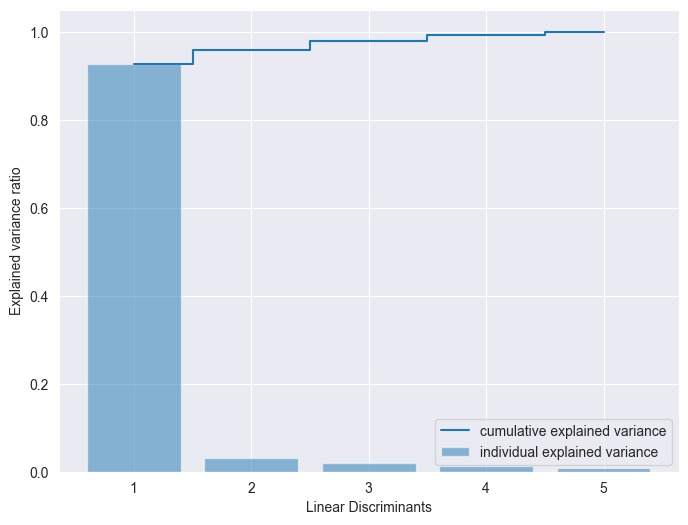

In [47]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.show()

In [48]:
# 3. Principal Component Scores
print("Linear Discriminant Scores (first 5 samples):\n", X_train_lda[:5])

Linear Discriminant Scores (first 5 samples):
 [[ 2.2809871  -0.54673526  1.00264401 -0.17741998  0.33124182]
 [-1.36868602  0.7124064  -0.63409138 -1.25337001  0.31639491]
 [ 4.19735577  1.16155298  2.3386788  -1.89118021  1.57456934]
 [-2.55436107  0.23225842 -1.09858115 -0.21407526  0.10340153]
 [ 3.8672565  -0.69489464  1.90230122 -2.2533119  -0.20012256]]


In [49]:
# 4. Loading Scores
loading_scores = pd.DataFrame(lda.scalings_, index=X.columns, columns=[f'LD{i+1}' for i in range(lda.scalings_.shape[1])])
print("\nLoading scores (contributions of each feature to the linear discriminants):")
print(loading_scores)


Loading scores (contributions of each feature to the linear discriminants):
                    LD1         LD2        LD3        LD4        LD5
Area           8.799593  107.803536  73.856160 -64.587073 -32.620260
Circularity    0.196107   -0.649658  -0.912472  -2.589479   0.188940
ConvexArea    -3.257457    1.661220  -1.797801   2.411834  -4.194517
EquivDiameter -3.737966   -2.499676 -12.985063  -1.139743   0.336261
Extent         0.129833   -1.051578   0.956880  -0.621769  -1.656041
...                 ...         ...        ...        ...        ...
NP3RTCON       0.261700    0.009889   0.161369   0.380831   0.068065
NP3SPCH        0.225875    0.082126  -0.121165   0.030169   0.158776
NP3TTAPL       0.295958    0.004177   0.422682  -0.273965   0.181310
NP3TTAPR       0.181047   -0.071765  -0.057383   0.026761  -0.245716
NHY           -0.207935   -0.225231   0.842729   0.648697  -0.221630

[91 rows x 5 columns]


In [50]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first linear discriminant:")
correlations = loading_scores['LD1']
print(correlations)


Correlation of each feature with the first linear discriminant:
Area             8.799593
Circularity      0.196107
ConvexArea      -3.257457
EquivDiameter   -3.737966
Extent           0.129833
                   ...   
NP3RTCON         0.261700
NP3SPCH          0.225875
NP3TTAPL         0.295958
NP3TTAPR         0.181047
NHY             -0.207935
Name: LD1, Length: 91, dtype: float64


In [51]:
correlations

Area             8.799593
Circularity      0.196107
ConvexArea      -3.257457
EquivDiameter   -3.737966
Extent           0.129833
                   ...   
NP3RTCON         0.261700
NP3SPCH          0.225875
NP3TTAPL         0.295958
NP3TTAPR         0.181047
NHY             -0.207935
Name: LD1, Length: 91, dtype: float64

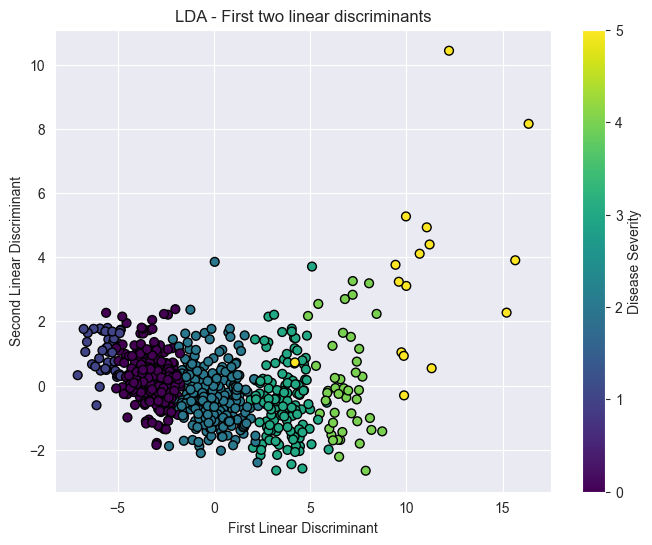

In [52]:
# 6. Visualization

plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.title('LDA - First two linear discriminants')
plt.colorbar(label='Disease Severity')
plt.show()


In [53]:

# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 4


In [54]:
# 8. Feature Importance
most_valuable_features = [np.abs(lda.scalings_[:, i]).argmax() for i in range(lda.scalings_.shape[1])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each linear discriminant:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1}: {feature}")


Most valuable features for each linear discriminant:
Linear Discriminant 1: Shannon_Entropy
Linear Discriminant 2: Area
Linear Discriminant 3: Shannon_Entropy
Linear Discriminant 4: Shannon_Entropy
Linear Discriminant 5: Skewness



Correlation matrix of linear discriminants:
 [[ 1.00000000e+00 -2.04634928e-15 -4.48050986e-15  6.00444254e-15
   3.11164919e-16]
 [-2.04634928e-15  1.00000000e+00 -1.31002251e-15 -2.29484011e-15
   4.48450592e-17]
 [-4.48050986e-15 -1.31002251e-15  1.00000000e+00  9.25808975e-16
   1.06990814e-14]
 [ 6.00444254e-15 -2.29484011e-15  9.25808975e-16  1.00000000e+00
   8.89460480e-15]
 [ 3.11164919e-16  4.48450592e-17  1.06990814e-14  8.89460480e-15
   1.00000000e+00]]


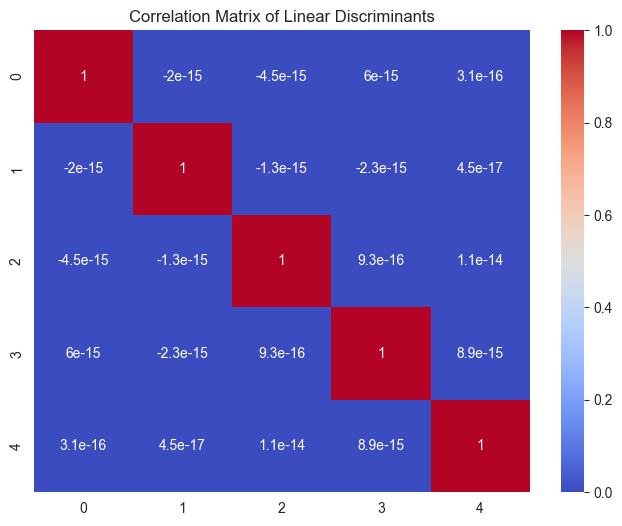

In [55]:
# 9. Multicollinearity
# LDA components are linear combinations, but we can check correlation among them
correlation_matrix = np.corrcoef(X_train_lda.T)
print("\nCorrelation matrix of linear discriminants:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Linear Discriminants')
plt.show()


In [56]:

# 10. Interpretation
# Interpretation often requires domain knowledge. The features contributing the most to each linear discriminant are the most important.
# These features can help in understanding the separation between classes.
print("\nInterpreting Linear Discriminants:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1} is largely influenced by {feature}.")


Interpreting Linear Discriminants:
Linear Discriminant 1 is largely influenced by Shannon_Entropy.
Linear Discriminant 2 is largely influenced by Area.
Linear Discriminant 3 is largely influenced by Shannon_Entropy.
Linear Discriminant 4 is largely influenced by Shannon_Entropy.
Linear Discriminant 5 is largely influenced by Skewness.


Agglomerative Clustering Silhouette Score: 0.5123
K-Means Clustering Silhouette Score: 0.5115
Agglomerative Clustering ARI: 0.8512
K-Means Clustering ARI: 0.7947
Agglomerative Clustering NMI: 0.8653
K-Means Clustering NMI: 0.8316


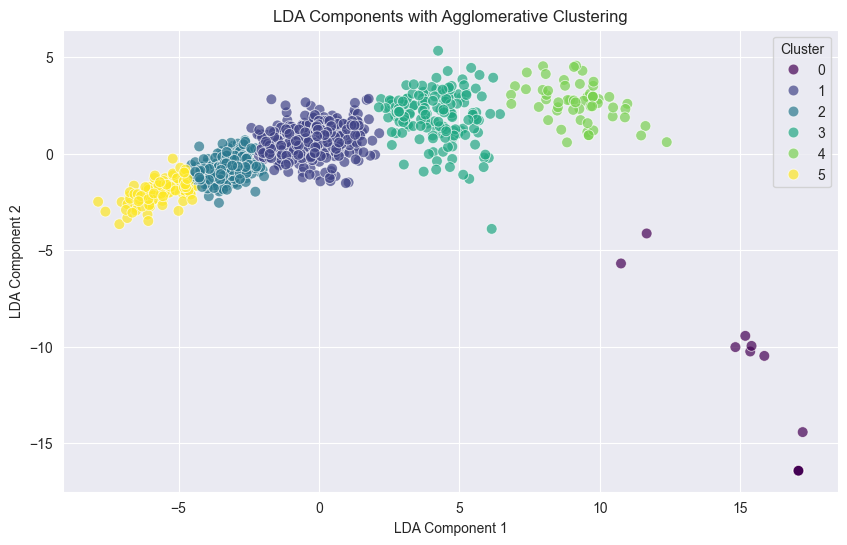

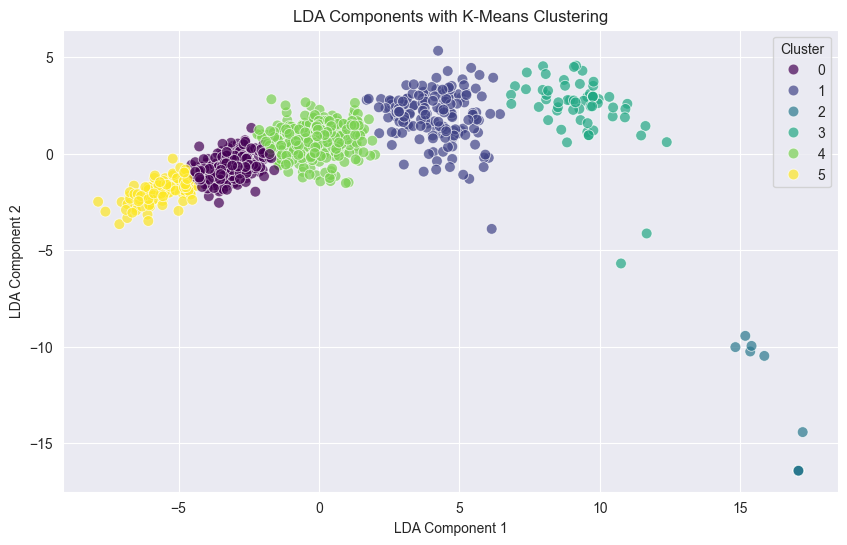

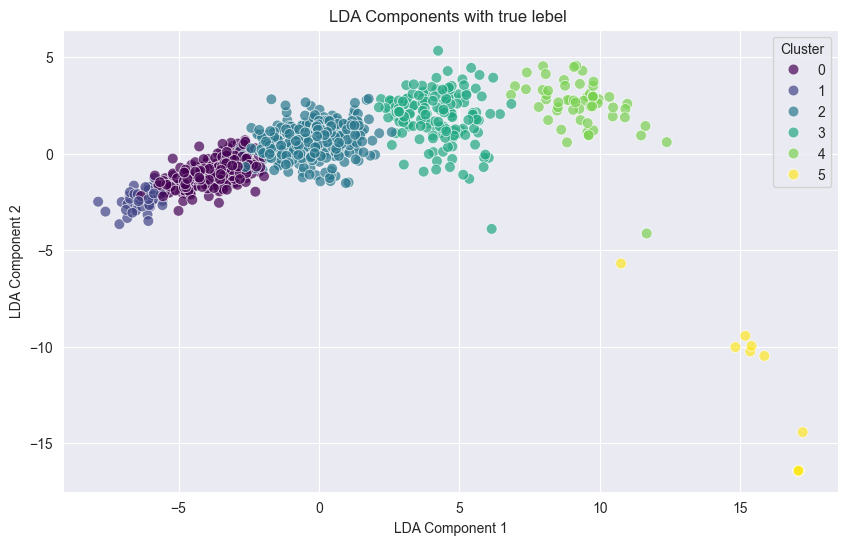

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode categorical features
X = pd.get_dummies(X, columns=categorical_features)

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Apply LDA for Dimensionality Reduction
lda = LDA(n_components=2)  # Reduce to 2 dimensions for visualization
X_lda = lda.fit_transform(X, y)
n_clusters = len(np.unique(y))
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(X_lda)

# Perform K-Means Clustering

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_lda)

# Evaluate Clustering Results
agg_silhouette_avg = silhouette_score(X_lda, agg_clusters)
kmeans_silhouette_avg = silhouette_score(X_lda, kmeans_clusters)
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette_avg:.4f}')
print(f'K-Means Clustering Silhouette Score: {kmeans_silhouette_avg:.4f}')

# Calculate ARI and NMI
agg_ari = adjusted_rand_score(y, agg_clusters)
kmeans_ari = adjusted_rand_score(y, kmeans_clusters)
agg_nmi = normalized_mutual_info_score(y, agg_clusters)
kmeans_nmi = normalized_mutual_info_score(y, kmeans_clusters)

print(f'Agglomerative Clustering ARI: {agg_ari:.4f}')
print(f'K-Means Clustering ARI: {kmeans_ari:.4f}')
print(f'Agglomerative Clustering NMI: {agg_nmi:.4f}')
print(f'K-Means Clustering NMI: {kmeans_nmi:.4f}')

# Visualization Function
def plot_clustering_results(X_lda, clusters, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=clusters, palette='viridis', s=60, alpha=0.7)
    plt.title(title)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.legend(title='Cluster')
    plt.show()

# Visualize LDA results with Agglomerative Clustering
plot_clustering_results(X_lda, agg_clusters, 'LDA Components with Agglomerative Clustering')

# Visualize LDA results with K-Means Clustering
plot_clustering_results(X_lda, kmeans_clusters, 'LDA Components with K-Means Clustering')
# Visualize LDA results with Agglomerative Clustering

# Visualize LDA results with K-Means Clustering
plot_clustering_results(X_lda, y, 'LDA Components with true lebel ')


In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from statsmodels.regression.mixed_linear_model import MixedLM

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encode the target variable
le = LabelEncoder()
data[target_column] = le.fit_transform(data[target_column])

# Define the response variable and predictors
response = target_column
predictors = numerical_features + categorical_features

# Fit the Linear Mixed Effects Model
# 'Patient ID' is the random effect to account for individual differences
model = MixedLM(data[response], data[predictors], groups=data['Patient ID'])

# Fit the model
mixed_lm_result = model.fit()

# Print the summary of the model
print(mixed_lm_result.summary())


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


              Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  Disease_Severity
No. Observations:   912      Method:              REML            
No. Groups:         228      Scale:               1.1203          
Min. group size:    4        Log-Likelihood:      -1347.0698      
Max. group size:    4        Converged:           Yes             
Mean group size:    4.0                                           
------------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------------
Area                   -3.861                                     
Circularity            -0.151    0.367 -0.411 0.681  -0.869  0.568
ConvexArea             -1.264    2.151 -0.588 0.557  -5.480  2.952
EquivDiameter          -1.393    1.873 -0.744 0.457  -5.063  2.277
Extent                 -0.243    0.570 -0.427 0.670  -1.361  0.875
FilledArea

B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from statsmodels.regression.mixed_linear_model import MixedLM

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encode the target variable
le = LabelEncoder()
data[target_column] = le.fit_transform(data[target_column])

# Fit a Growth Curve Model
# Adding Visit as a fixed effect to model time-dependent changes
# 'Patient ID' is the random effect to account for individual trajectories

# Define the formula for the growth curve model
import statsmodels.formula.api as smf

# Including both fixed effects (Visit) and random effects (by Patient ID)
model = smf.mixedlm(f"{target_column} ~ Visit", data, groups=data["Patient ID"], re_formula="~Visit")

# Fit the model
growth_curve_model = model.fit()

# Print the summary of the model
print(growth_curve_model.summary())


                 Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    Disease_Severity
No. Observations:     912        Method:                REML            
No. Groups:           228        Scale:                 0.6593          
Min. group size:      4          Log-Likelihood:        -1403.9057      
Max. group size:      4          Converged:             Yes             
Mean group size:      4.0                                               
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      1.289    0.076 16.968 0.000  1.141  1.438
Visit[T.V2]                    0.303    0.089  3.383 0.001  0.127  0.478
Visit[T.V3]                    0.364    0.087  4.168 0.000  0.193  0.535
Visit[T.V4]                    0.917    0.089 10.306 0.000  0.742  1.

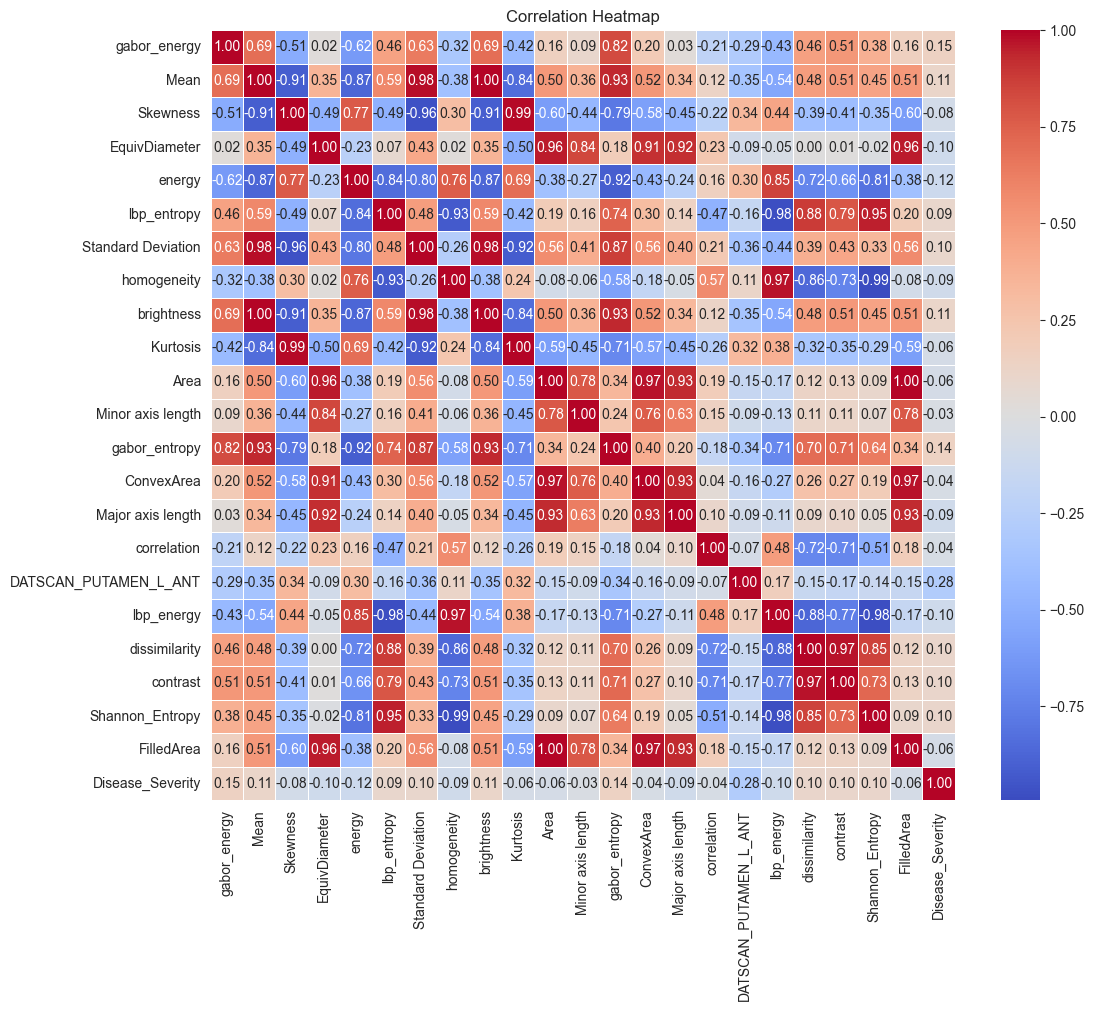

Point Biserial Correlation Results:
                       Correlation       p-value
DATSCAN_PUTAMEN_L_ANT    -0.280198  6.494002e-18
gabor_energy              0.151001  4.646408e-06
gabor_entropy             0.138877  2.568989e-05
energy                   -0.118949  3.181829e-04
Mean                      0.105780  1.378692e-03
brightness                0.105780  1.378692e-03
contrast                  0.103980  1.664506e-03
lbp_energy               -0.103074  1.828295e-03
EquivDiameter            -0.103038  1.834989e-03
Shannon_Entropy           0.102745  1.891275e-03
dissimilarity             0.102465  1.946466e-03
Standard Deviation        0.095476  3.902457e-03
Major axis length        -0.094639  4.229298e-03
homogeneity              -0.093655  4.645204e-03
lbp_entropy               0.091149  5.876505e-03
Skewness                 -0.079425  1.643556e-02
Kurtosis                 -0.063557  5.502522e-02
FilledArea               -0.060154  6.940766e-02
Area                     -0.06007

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, f_oneway, chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define your features and target variable
features_to_test = [
    'gabor_energy', 'Mean', 'Skewness', 'EquivDiameter', 'energy', 'lbp_entropy', 'Standard Deviation', 'homogeneity', 'brightness', 'Kurtosis', 'Area', 'Minor axis length', 'gabor_entropy', 'ConvexArea', 'Major axis length', 'correlation', 'DATSCAN_PUTAMEN_L_ANT', 'lbp_energy', 'dissimilarity', 'contrast', 'Shannon_Entropy', 'FilledArea'
]
target_variable = 'Disease_Severity'

# Encode categorical target variable if necessary
label_encoder = LabelEncoder()
data[target_variable] = label_encoder.fit_transform(data[target_variable])

# Calculate correlations
numerical_data = data[features_to_test + [target_variable]]

# Correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Initialize dictionaries to store results
point_biserial_results = {}
anova_results = {}
chi_square_results = {}

# Point Biserial Correlation (for binary target)
for feature in features_to_test:
    if data[feature].dtype in [float, int]:  # Ensure the feature is numerical
        correlation, p_value = pointbiserialr(data[feature], data[target_variable])
        point_biserial_results[feature] = (correlation, p_value)

# Convert results to DataFrame
point_biserial_df = pd.DataFrame.from_dict(point_biserial_results, orient='index', columns=['Correlation', 'p-value'])
point_biserial_df.sort_values(by='p-value', ascending=True, inplace=True)

# ANOVA (for multi-class target)
unique_categories = data[target_variable].unique()
if len(unique_categories) > 2:  # Check if target variable is multi-class
    for feature in features_to_test:
        if data[feature].dtype in [float, int]:  # Ensure the feature is numerical
            groups = [data[data[target_variable] == category][feature] for category in unique_categories]
            f_stat, p_value = f_oneway(*groups)
            anova_results[feature] = (f_stat, p_value)

    # Convert results to DataFrame
    anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic', 'p-value'])
    anova_df.sort_values(by='p-value', ascending=True, inplace=True)

# Chi-Square Test (for categorical features)
categorical_features = ['NP3LGAGL', 'NP2FREZ', 'NP2TURN', 'NP3KTRMR', 'NP3TTAPL', 'NP3SPCH', 'NP3RIGRL', 'NP2HYGN']
for feature in categorical_features:
    if data[feature].dtype == 'object':  # Ensure the feature is categorical
        contingency_table = pd.crosstab(data[feature], data[target_variable])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        chi_square_results[feature] = p

# Convert results to DataFrame
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient='index', columns=['p-value'])
chi_square_df.sort_values(by='p-value', ascending=True, inplace=True)

# Print results
print("Point Biserial Correlation Results:")
print(point_biserial_df)

if len(unique_categories) > 2:
    print("\nANOVA Results:")
    print(anova_df)

print("\nChi-Square Test Results:")
print(chi_square_df)


Pairwise p-values for each feature:
                          V1_V2         V1_V3         V1_V4     V2_V3  \
Area                   0.038717  1.614968e-02  2.530487e-01  0.745365   
ConvexArea             0.055100  4.103393e-02  3.536597e-01  0.923949   
DATSCAN_PUTAMEN_L_ANT  0.000110  4.752675e-08  1.364118e-22  0.064677   
EquivDiameter          0.112713  7.876782e-02  9.159925e-01  0.842686   
FilledArea             0.038375  1.559250e-02  2.512370e-01  0.736107   
Kurtosis               0.000928  4.050181e-05  1.154652e-04  0.317051   
Major axis length      0.122352  2.118603e-01  7.985614e-01  0.760574   
Mean                   0.028002  5.515199e-04  4.391060e-04  0.173317   
Minor axis length      0.196964  8.080288e-02  6.511015e-01  0.622649   
Shannon_Entropy        0.420556  3.162629e-01  7.021595e-02  0.766218   
Skewness               0.001513  3.769193e-05  6.777224e-05  0.252115   
Standard Deviation     0.007960  7.929339e-05  1.432595e-04  0.150632   
brightness     

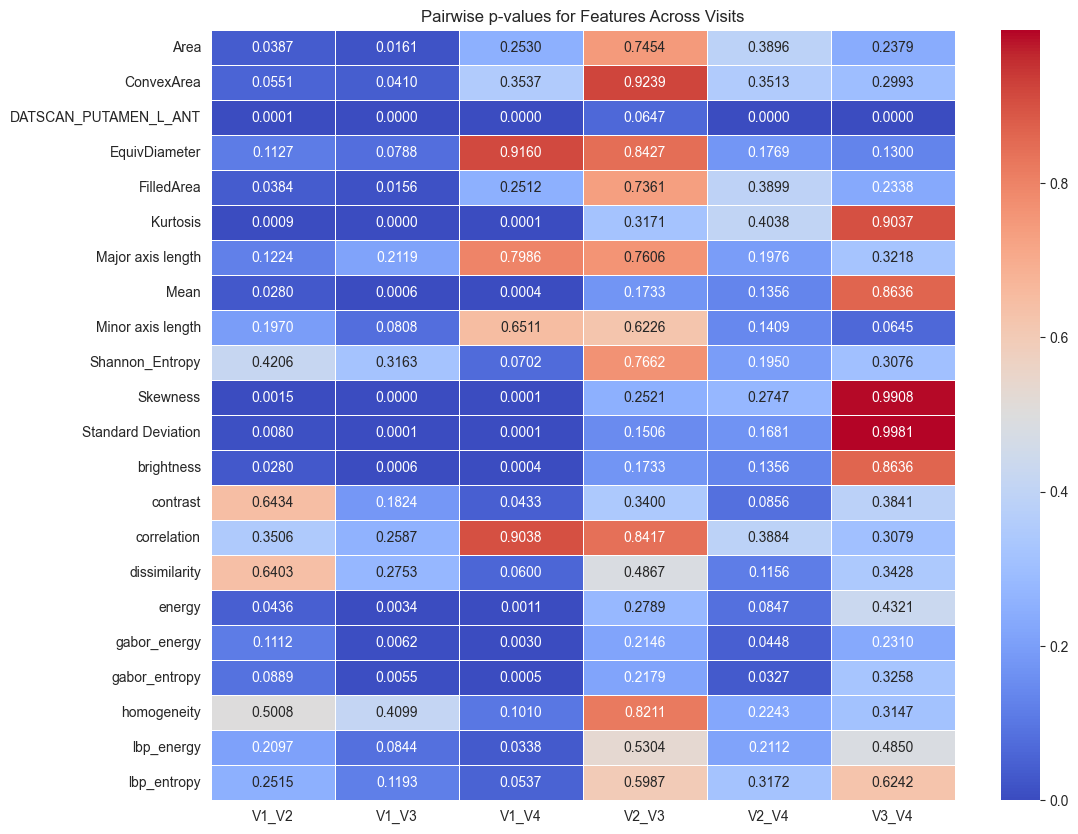

In [65]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Load your dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define your features and visits
features_to_test = [
   'gabor_energy', 'Mean', 'Skewness', 'EquivDiameter', 'energy', 'lbp_entropy', 'Standard Deviation', 'homogeneity', 'brightness', 'Kurtosis', 'Area', 'Minor axis length', 'gabor_entropy', 'ConvexArea', 'Major axis length', 'correlation', 'DATSCAN_PUTAMEN_L_ANT', 'lbp_energy', 'dissimilarity', 'contrast', 'Shannon_Entropy', 'FilledArea'
]
visit_pairs = [('V1', 'V2'), ('V1', 'V3'), ('V1', 'V4'), ('V2', 'V3'), ('V2', 'V4'), ('V3', 'V4')]

# Initialize dictionary to store results
pairwise_p_values = {}

# Iterate over each feature
for feature in features_to_test:
    feature_p_values = {}
    for v1, v2 in visit_pairs:
        # Subset data for each visit
        data_v1 = data[data['Visit'] == v1][feature].dropna()
        data_v2 = data[data['Visit'] == v2][feature].dropna()

        if len(data_v1) > 1 and len(data_v2) > 1:  # Ensure there are enough data points
            # Perform t-test
            t_stat, p_value = ttest_ind(data_v1, data_v2, nan_policy='omit')
            feature_p_values[f"{v1}_{v2}"] = p_value
        else:
            feature_p_values[f"{v1}_{v2}"] = np.nan  # Not enough data for comparison

    # Store results
    pairwise_p_values[feature] = feature_p_values

# Convert results to DataFrame for better readability
pairwise_p_values_df = pd.DataFrame(pairwise_p_values).T
pairwise_p_values_df.sort_index(inplace=True)

# Save results to CSV
pairwise_p_values_df.to_csv("pairwise_p_values.csv")

# Print results
print("Pairwise p-values for each feature:")
print(pairwise_p_values_df)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame from CSV if needed
# pairwise_p_values_df = pd.read_csv("pairwise_p_values.csv", index_col=0)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pairwise_p_values_df, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Pairwise p-values for Features Across Visits")
plt.show()
